<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/_L6_2_Histogram_Equalization_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

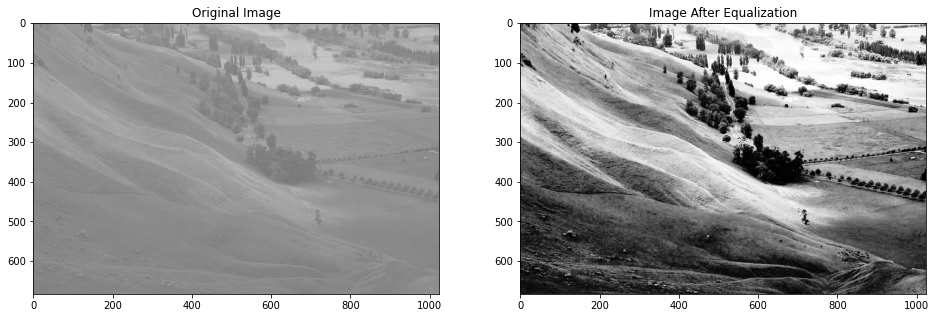

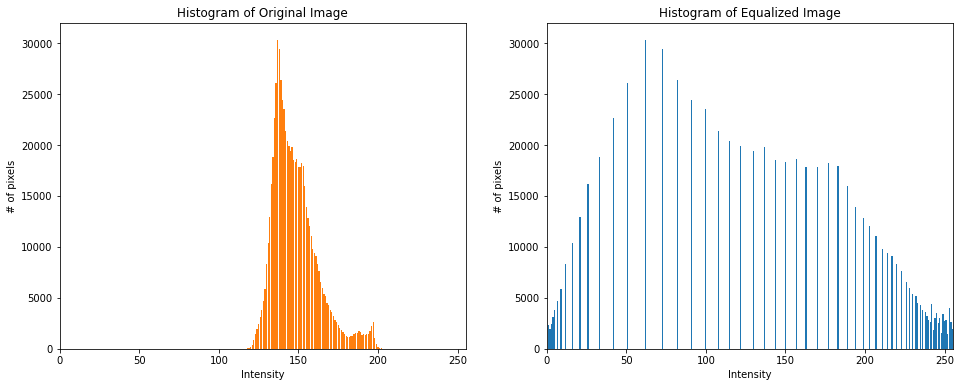

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Load image
img_url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/bay.jpg'
img_array = np.asarray(bytearray(urllib.request.urlopen(img_url).read()), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Show images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Image After Equalization')
plt.savefig('Histogram_Equalization_Image.png', dpi=300)
plt.show()

# Show histograms of two images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
# only return 1 var
counts = cv2.calcHist([img], [0], None, [256], [0, 256])
# to fill x line of bar
x = np.arange(256)
ax1.bar(x, counts.flatten())
ax1.bar(x.flatten(), counts.flatten())
ax1.set_xlim([0, 255])
ax1.set_ylim([0, 32000])
ax1.set_xlabel('Intensity')
ax1.set_ylabel('# of pixels')
ax1.set_title('Histogram of Original Image')

counts = cv2.calcHist([eq_img], [0], None, [256], [0, 256])
ax2.bar(x.flatten(), counts.flatten())
ax2.set_xlim([0, 255])
ax2.set_ylim([0, 32000])
ax2.set_xlabel('Intensity')
ax2.set_ylabel('# of pixels')
ax2.set_title('Histogram of Equalized Image')
plt.show()
